In [ ]:
## ResNet34 --> 86%
## ResNet50 --> 89% with resizing from 128--> 256
## ResNet101 --> 94% with resizing from 64-->128--> 256
## Densenet169 --> 93.5% with resizing from 64-->128--> 256
## Squeezenet1_0 --> 87.7% with resizing from 64-->128--> 256

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 13kB/s 
     |████████████████████████████████| 4.0MB 87kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [ ]:
from fastai import *
from fastai.vision import *
import pandas as pd
import os
BASE_DIR="/content/drive/MyDrive/"
ANNO_DIR= "Garbage Annotation (File responses)/Upload the annotation data .csv file (File responses)"
IMG_DIR= "Scraped images/Extracted_Images"

# Creating Dataset

In [ ]:
anno_files=os.listdir(BASE_DIR + ANNO_DIR)
#labels=[]
x_col=[]
y_col=[]

for i in range(len(anno_files)):
  #labels.append(anno_files[i].replace(" - Swachta Mitra.csv",''))
  if anno_files[i][-3:]=="csv":
    df=pd.read_csv(BASE_DIR + ANNO_DIR+"/"+anno_files[i])
    for index, row in df.iterrows():
      #x_col.append(IMG_DIR+"/"+labels[i]+"/"+row['filename'])
      x_col.append(row['filename'])
      y_col.append(str(min(row['region_count'],1)))

print(x_col[0])

count=0
df=pd.read_csv(BASE_DIR + "Scraped images/link.csv")
for i in range(len(x_col)):
  name=x_col[i]
  try:
    row=df.loc[df['Files'] == x_col[i]]
    x_col[i]=IMG_DIR+"/"+" ".join((row['Queries'].to_string()).split()[1:])+"/"+x_col[i]
  except:
    print((row['Queries'].to_string()).split()[1:])
    count+=1

print(x_col)
print(count)

train_total = pd.DataFrame({'x': x_col,'y': y_col})

21879.jpg
['Scraped images/Extracted_Images/Beach Dump/21879.jpg', 'Scraped images/Extracted_Images/Beach Dump/21878.jpg', 'Scraped images/Extracted_Images/Beach Dump/21877.jpg', 'Scraped images/Extracted_Images/Beach Dump/21876.jpg', 'Scraped images/Extracted_Images/Beach Dump/21875.jpg', 'Scraped images/Extracted_Images/Beach Dump/21874.jpg', 'Scraped images/Extracted_Images/Beach Dump/21873.png', 'Scraped images/Extracted_Images/Beach Dump/21872.jpg', 'Scraped images/Extracted_Images/Beach Dump/21871.jpg', 'Scraped images/Extracted_Images/Beach Dump/21870.jpg', 'Scraped images/Extracted_Images/Beach Dump/21869.jpeg', 'Scraped images/Extracted_Images/Beach Dump/21868.jpg', 'Scraped images/Extracted_Images/Beach Dump/21867.jpg', 'Scraped images/Extracted_Images/Beach Dump/21866.jpg', 'Scraped images/Extracted_Images/Beach Dump/21865.jpg', 'Scraped images/Extracted_Images/Beach Dump/21864.jpeg', 'Scraped images/Extracted_Images/Beach Dump/21861.jpg', 'Scraped images/Extracted_Images/Be

In [ ]:
x = []
y = []
cnt = 200
for index, row in train_total.iterrows():
  if cnt<=0:
    break
  else:
    x.append(row['x'])
    y.append(row['y'])
    train_total.drop(index,inplace=True)
    cnt-=1

data = {'x': x, 'y': y}
test_df = pd.DataFrame(data)
# train_total
test_df

,x,y
0,Scraped images/Extracted_Images/Beach Dump/218...,0
1,Scraped images/Extracted_Images/Beach Dump/218...,0
2,Scraped images/Extracted_Images/Beach Dump/218...,0
3,Scraped images/Extracted_Images/Beach Dump/218...,0
4,Scraped images/Extracted_Images/Beach Dump/218...,0
...,...,...
195,Scraped images/Extracted_Images/Indian Market ...,0
196,Scraped images/Extracted_Images/Indian Market ...,1
197,Scraped images/Extracted_Images/Indian Market ...,0
198,Scraped images/Extracted_Images/Indian Market ...,0


## Create Dataframe for Non-garbage

In [ ]:
import pandas as pd
import os

non_garbage = pd.DataFrame()
image_names = []
for i in range(1,5):
    name = str(i)+"-non-garbage"
    try:
        for j in os.listdir(BASE_DIR + "Scraped images/Non-garbage/"+name):
            image_names.append("Scraped images/Non-garbage/"+name +"/"+ j)
    except:
        for j in os.listdir(BASE_DIR + "Scraped images/Non-garbage/""3-non garbage"):
            image_names.append("Scraped images/Non-garbage/"+"3-non garbage/" + j)

non_garbage['x'] = image_names
non_garbage['y'] = ['0']*len(image_names)
non_garbage

,x,y
0,Scraped images/Non-garbage/1-non-garbage/21878...,0
1,Scraped images/Non-garbage/1-non-garbage/21871...,0
2,Scraped images/Non-garbage/1-non-garbage/21872...,0
3,Scraped images/Non-garbage/1-non-garbage/21877...,0
4,Scraped images/Non-garbage/1-non-garbage/21879...,0
...,...,...
1102,Scraped images/Non-garbage/4-non-garbage/4053.jpg,0
1103,Scraped images/Non-garbage/4-non-garbage/4054.jpg,0
1104,Scraped images/Non-garbage/4-non-garbage/4057.jpg,0
1105,Scraped images/Non-garbage/4-non-garbage/4059.jpg,0


## Wade-ai Data


In [ ]:
%cd /content/drive/MyDrive/wade-ai

/content/drive/MyDrive/wade-ai


In [ ]:
import pandas as pd

wadeai_data_val = pd.DataFrame()
filepath = []
label = []
import json,os

# for i in os.listdir(""):

for i in os.listdir("Trash_Detection/trash/dataset/train/"):
    if i.endswith('.json'):
        with open('Trash_Detection/trash/dataset/train/' + str(i)) as jsonfile:
            annotations = json.load(jsonfile)
            for i in annotations['_via_img_metadata']:
                row = annotations['_via_img_metadata'][i]
                filepath.append("wade-ai/Trash_Detection/trash/dataset/train/" + str(row['filename']))
                if len(row['regions']) is 0:
                    # print(0)
                    label.append('0')
                else:
                    label.append('1')

for i in annotations['_via_img_metadata']:
    row = annotations['_via_img_metadata'][i]
    filepath.append("wade-ai/Trash_Detection/trash/dataset/val/" + str(row['filename']))
    if len(row['regions']) is 0:
        # print(0)
        label.append('0')
    else:
        label.append('1')

wadeai_data_val['x'] = filepath
wadeai_data_val['y'] = label
wadeai_data_val

,x,y
0,wade-ai/Trash_Detection/trash/dataset/train/ad...,0
1,wade-ai/Trash_Detection/trash/dataset/train/ad...,1
2,wade-ai/Trash_Detection/trash/dataset/train/ad...,1
3,wade-ai/Trash_Detection/trash/dataset/train/ad...,0
4,wade-ai/Trash_Detection/trash/dataset/train/ad...,0
...,...,...
1903,wade-ai/Trash_Detection/trash/dataset/val/625.jpg,1
1904,wade-ai/Trash_Detection/trash/dataset/val/615.jpg,1
1905,wade-ai/Trash_Detection/trash/dataset/val/569.jpg,1
1906,wade-ai/Trash_Detection/trash/dataset/val/555.jpg,1


In [ ]:
wadeai_data_val.to_csv("WADEAI_all.csv",header=False)

In [ ]:
%cd /content/

/content


## Easy Images from Dataset

In [ ]:
os.path.exists(BASE_DIR + "Scraped images/Extracted_Images/")

False

In [ ]:
easy = pd.read_csv(BASE_DIR + "Scraped images/Easy.csv")
garbage_names = []
created_j = []
for i in easy['Easy']:
    garbage_names.append("Scraped images/boxes/"+i)
created = pd.read_csv(BASE_DIR + "Scraped images/Created_Junk_True_Garbage.csv")
for i in created['True_Garbage']:
    created_j.append("Scraped images/created_junk/"+i)
garbage = pd.DataFrame()
garbage['x'] = garbage_names
garbage['y'] = ['1']*len(garbage_names)
garbage

,x,y
0,Scraped images/boxes/107.jpg,1
1,Scraped images/boxes/114.jpg,1
2,Scraped images/boxes/121.jpg,1
3,Scraped images/boxes/123.jpg,1
4,Scraped images/boxes/139.jpg,1
...,...,...
849,Scraped images/boxes/22012.jpg,1
850,Scraped images/boxes/10298.jpg,1
851,Scraped images/boxes/5375.jpg,1
852,Scraped images/boxes/27239.jpg,1


## Merging all types of Dataset

In [ ]:
total_df = pd.DataFrame()
total_df = pd.concat([garbage,non_garbage,wadeai_data_val])
total_df = total_df.sample(frac=1).reset_index(drop=True)
total_df

,x,y
0,wade-ai/Trash_Detection/trash/dataset/train/fi...,0
1,Scraped images/Non-garbage/4-non-garbage/3193....,0
2,Scraped images/boxes/2030.jpg,1
3,wade-ai/Trash_Detection/trash/dataset/train/18...,0
4,wade-ai/Trash_Detection/trash/dataset/train/43...,1
...,...,...
3864,wade-ai/Trash_Detection/trash/dataset/train/fi...,0
3865,wade-ai/Trash_Detection/trash/dataset/train/1b...,1
3866,wade-ai/Trash_Detection/trash/dataset/train/fi...,0
3867,Scraped images/Non-garbage/2-non-garbage/21503...,0


### Removing Invalid rows

In [ ]:
lab = total_df['y'].tolist()
for i, t in enumerate(total_df['y']):
    if isinstance(t, int):
      total_df['y'][i] = str(t)

In [ ]:
total_df.to_csv('/content/total_df.csv')

In [ ]:
dirs = total_df['x'].tolist()
labels = total_df['y'].tolist()
cnt = 0
for i, dir in enumerate(dirs):
    if not os.path.exists(BASE_DIR + dir):
        # dirs.pop(i)
        # labels.pop(i)
        cnt+=1
print(cnt)
# data = {'x': dirs, 'y': labels}
# total_df = pd.DataFrame(data)
# total_df

0


In [ ]:
total_df = pd.read_csv('/content/total_df.csv', index_col=0)
total_df

,x,y
0,Scraped images/Non-garbage/4-non-garbage/3193....,0
1,Scraped images/boxes/2030.jpg,1
2,wade-ai/Trash_Detection/trash/dataset/train/18...,0
3,wade-ai/Trash_Detection/trash/dataset/train/43...,1
4,Scraped images/Non-garbage/2-non-garbage/316.jpg,0
...,...,...
3616,wade-ai/Trash_Detection/trash/dataset/train/fi...,0
3617,wade-ai/Trash_Detection/trash/dataset/train/1b...,1
3618,wade-ai/Trash_Detection/trash/dataset/train/fi...,0
3619,Scraped images/Non-garbage/2-non-garbage/21503...,0


In [ ]:
if not os.path.exists('/content/test'):
  os.mkdir('/content/test')
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0)
data_128 = (ImageList.from_df(total_df, BASE_DIR)
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/test')              
        .transform(tfms, size=128)
        .databunch(num_workers=4)
        .normalize(imagenet_stats))

data_256 = (ImageList.from_df(total_df, BASE_DIR)
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/test')              
        .transform(tfms, size=256)
        .databunch(num_workers=4)
        .normalize(imagenet_stats))

data_64 = (ImageList.from_df(total_df, BASE_DIR)
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/test')              
        .transform(tfms, size=64)
        .databunch(num_workers=4)
        .normalize(imagenet_stats))

# data_32 = (ImageList.from_df(total_df, BASE_DIR)
#         .split_by_rand_pct()              
#         .label_from_df()            
#         .add_test_folder(test_folder = '/content/test')              
#         .transform(tfms, size=32)
#         .databunch(num_workers=4)
#         .normalize(imagenet_stats))

test = (ImageList.from_df(test_df, BASE_DIR)
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/test')              
        .transform(tfms, size=256)
        .databunch(num_workers=4)
        .normalize(imagenet_stats))

In [ ]:
data_128.batch_size

64

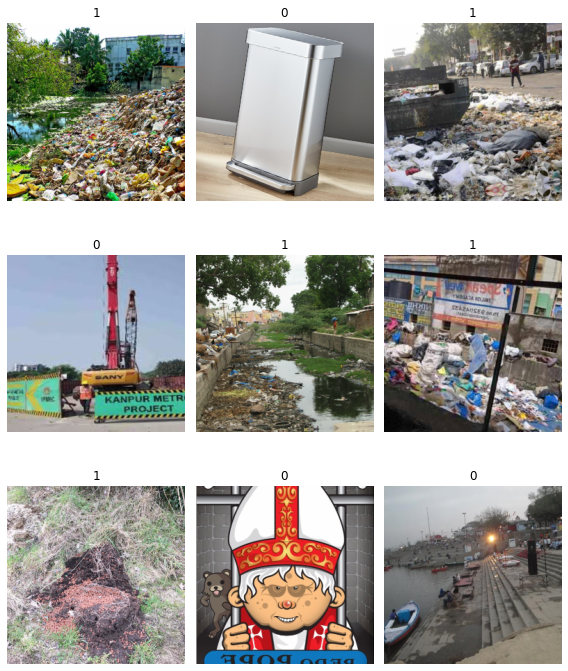

In [ ]:
data_256.show_batch(rows=3, figsize=(8,10))

In [ ]:
print(data_64.classes)
print(data_128.classes)
print(data_256.classes)

[0, 1]
[0, 1]
[0, 1]


# Model Building

In [ ]:
learn_101.save('/content/drive/MyDrive/squeezenet0_87')

In [ ]:
# learn_34 = cnn_learner(data_128, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
# learn_101 = cnn_learner(data_64, models.resnet101, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
learn_101 = cnn_learner(data_64, models.squeezenet1_1, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /root/.cache/torch/checkpoints/squeezenet1_1-f364aa15.pth


In [ ]:
learn_50 = cnn_learner(data_256, models.resnet101, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
learn_50.load('/content/drive/MyDrive/resnet101_94.19')

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Learner(data=ImageDataBunch;

Train: LabelList (2897 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,1,0,1
Path: /content/drive/MyDrive;

Valid: LabelList (724 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,1,0,0
Path: /content/drive/MyDrive;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /content/drive/MyDrive, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


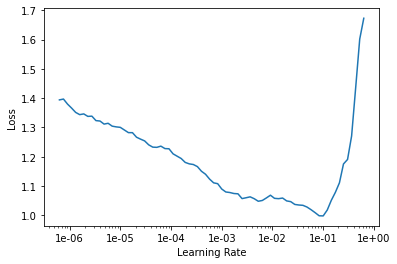

In [ ]:
learn_50.lr_find() #finds the change in loss with respect to the learning rate
learn_50.recorder.plot()#plots that change

In [ ]:
learn_101.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.904605,0.562713,0.236188,0.763812,07:17
1,0.761292,0.534433,0.220994,0.779006,02:47
2,0.643461,0.480751,0.203039,0.796961,02:51
3,0.570812,0.458109,0.208564,0.791436,02:49
4,0.511234,0.428952,0.215470,0.784530,02:51
5,0.469597,0.434680,0.194751,0.805249,02:54
6,0.439313,0.437116,0.216851,0.783149,02:48
7,0.417833,0.425410,0.197514,0.802486,02:50
8,0.398797,0.414770,0.186464,0.813536,02:48
9,0.383729,0.413204,0.190608,0.809392,02:51


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


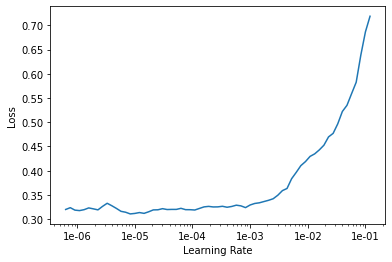

In [ ]:
learn_101.data = data_128 #loading the high res images
learn_101.unfreeze() #unfreezing the inital layers
learn_101.lr_find()
learn_101.recorder.plot()

In [ ]:
learn_101.fit_one_cycle(3, slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.313497,0.333907,0.154696,0.845304,03:45
1,0.317689,0.335035,0.167127,0.832873,03:45
2,0.308435,0.330507,0.156077,0.843923,03:49


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


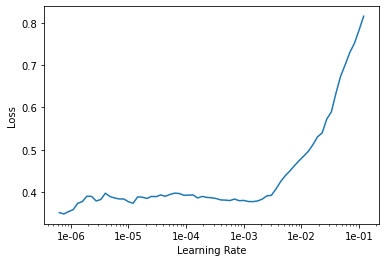

In [ ]:
data_256.batch_size = 32
learn_101.data = data_256 #loading the high res images
learn_101.unfreeze() #unfreezing the inital layers
learn_101.lr_find()
learn_101.recorder.plot()

In [ ]:
learn_101.fit_one_cycle(5, slice(1e-7,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.304028,0.299415,0.125691,0.874309,04:29
1,0.309843,0.300797,0.128453,0.871547,04:28
2,0.300743,0.298518,0.127072,0.872928,04:29
3,0.309250,0.296605,0.122928,0.877072,04:32
4,0.323333,0.296789,0.125691,0.874309,04:31


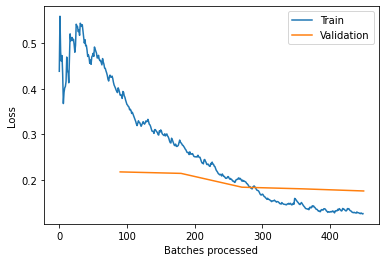

In [ ]:
learn_101.recorder.plot_losses()

In [ ]:
learn_101.save('/content/drive/MyDrive/resnet101_94.19')

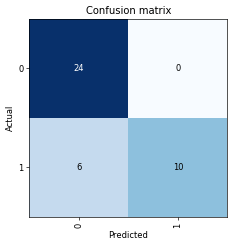

In [ ]:
learn_101.data = test
interp = ClassificationInterpretation.from_learner(learn_101)

losses,idxs = interp.top_losses()

# len(data_128.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

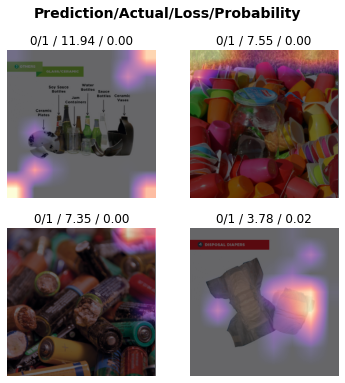

In [ ]:
interp.plot_top_losses(4, figsize=(6,6), heatmap=True)

In [ ]:
import time
# test = test_df['x'].tolist()
# test=wadeai_data_val['x'].tolist()
folder = 'Real_Garb/'
BASE_DIR="/content/drive/MyDrive/"

test = os.listdir('/content/drive/MyDrive/Clicked photos/' + folder)
# test = created_j
label=test_df['y'].tolist()#wadeai_data_val['y'].tolist()
# from PIL import Image 
# from keras.preprocessing import image
# open method used to open different extension image file 
# test_images = ImageList.from_df(test_df, path=BASE_DIR, folder='test')
BASE_DIR = BASE_DIR + 'Clicked photos/' + folder 
y_true, y_pred = [], []
strt = time.time()
for i in range(len(test)):
  # 
  # im = open_image(BASE_DIR + 'Clicked photos/' + folder + test[i])
  if not os.path.exists(BASE_DIR +  test[i]):
    continue
  
  im = open_image(BASE_DIR + test[i])
  strt = time.time()
  _, _, prob = learn_101.predict(im)
  # print(prob)
  # ima = cv2.imread(BASE_DIR + test[i])
  # cv2_imshow(ima)
  # print(prob)
  # print(label[i])
  print(time.time()-strt)
  # y_true.append(int(label[i]))
  y_true.append(1)
  y_pred.append(int(prob.argmax()))
# # im = cv2.imread(BASE_DIR + test[0])
# # im = tensor(im)
# print(time.time()-strt)

tensor([0.0229, 0.9771])
0.04890894889831543
tensor([0.0610, 0.9390])
0.04176664352416992
tensor([0.0414, 0.9586])
0.04629063606262207
tensor([0.0207, 0.9793])
0.04357743263244629
tensor([0.0185, 0.9815])
0.04181027412414551
tensor([0.0104, 0.9896])
0.04391336441040039
tensor([0.0379, 0.9621])
0.04304385185241699
tensor([0.0664, 0.9336])
0.04587578773498535
tensor([0.0633, 0.9367])
0.04325246810913086
tensor([0.0439, 0.9561])
0.04538917541503906
tensor([0.0601, 0.9399])
0.04371380805969238
tensor([0.0039, 0.9961])
0.04327130317687988
tensor([0.0266, 0.9734])
0.04606366157531738
tensor([0.1641, 0.8359])
0.045610904693603516
tensor([0.0675, 0.9325])
0.04613971710205078
tensor([0.0126, 0.9874])
0.04445075988769531
tensor([0.0046, 0.9954])
0.04499554634094238
tensor([0.0492, 0.9508])
0.043057918548583984
tensor([0.0565, 0.9435])
0.04582619667053223
tensor([0.0181, 0.9819])
0.044388532638549805
tensor([0.0765, 0.9235])
0.04398322105407715
tensor([0.0668, 0.9332])
0.046071529388427734
tensor

In [ ]:
y_pred

[1]

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
matrix = classification_report(y_true, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97        50

    accuracy                           0.94        50
   macro avg       0.50      0.47      0.48        50
weighted avg       1.00      0.94      0.97        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
for i in range(5):
  if y_pred[i]!=y_true[i]:
    im = cv2.imread(BASE_DIR + test[i])
    cv2_imshow(im)